In [24]:
import warnings
warnings.filterwarnings(action='ignore')

In [25]:
import cv2, os, glob
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Input, Activation
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from skimage.transform import pyramid_expand
from Subpixel import Subpixel
from DataGenerator import DataGenerator

In [43]:
base_path = r'C:\Users\ebool\study\image\celeba-dataset\processed'

x_train_list = sorted(glob.glob(os.path.join(base_path, 'x_train', '*.npy')))
x_val_list = sorted(glob.glob(os.path.join(base_path, 'x_val', '*.npy')))

print(len(x_train_list), len(x_val_list))
print(x_train_list[0])

162770 19867
C:\Users\ebool\study\image\celeba-dataset\processed\x_train\000001.npy


In [44]:
x_train_list

['C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000001.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000002.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000003.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000004.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000005.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000006.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000007.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000008.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000009.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000010.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000011.npy',
 'C:\\Users\\ebool\\study\\image\\celeba-dataset\\processed\\x_train\\000012.npy',
 'C:

(44, 44, 3) (44, 44, 3)


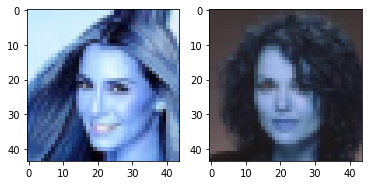

In [45]:
x1 = np.load(x_train_list[0])
x2 = np.load(x_val_list[0])

print(x1.shape, x2.shape)

plt.subplot(1, 2, 1)
plt.imshow(x1)
plt.subplot(1, 2, 2)
plt.imshow(x2)

In [46]:
train_gen = DataGenerator(list_IDs=x_train_list, 
                          labels=None, 
                          batch_size=16, 
                          dim=(44,44), 
                          n_channels=3, 
                          n_classes=None, 
                          shuffle=True)

val_gen = DataGenerator(list_IDs=x_val_list, 
                        labels=None, 
                        batch_size=16, 
                        dim=(44,44), 
                        n_channels=3, 
                        n_classes=None, 
                        shuffle=False)

In [47]:
upscale_factor = 4

inputs = Input(shape=(44, 44, 3))

net = Conv2D(filters=64, 
             kernel_size=5, 
             strides=1, 
             padding='same', 
             activation='relu')(inputs)

net = Conv2D(filters=64, 
             kernel_size=3, 
             strides=1, 
             padding='same', 
             activation='relu')(net)

net = Conv2D(filters=32, 
             kernel_size=3, 
             strides=1, 
             padding='same', 
             activation='relu')(net)

net = Conv2D(filters=upscale_factor**2, 
             kernel_size=3, 
             strides=1, 
             padding='same', 
             activation='relu')(net)

net = Subpixel(filters=3,
               kernel_size=3, 
               r=upscale_factor, 
               padding='same')(net)

outputs = Activation('relu')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 44, 44, 3)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 44, 44, 64)        4864      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 44, 44, 32)        18464     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 44, 44, 16)        4624      
_________________________________________________________________
subpixel_5 (Subpixel)        (None, 176, 176, 3)       6960      
_________________________________________________________________
activation_5 (Activation)    (None, 176, 176, 3)       0   

In [48]:
history = model.fit_generator(train_gen, 
                              validation_data=val_gen, 
                              epochs=10, 
                              verbose=1, 
                              callbacks=[ModelCheckpoint(r'C:\Users\ebool\study\source\OpenCV_super_resolution\models\model.h5', 
                                                         monitor='val_loss', 
                                                         verbose=1, 
                                                         save_best_only=True)])

Epoch 1/10
10173/10173 [==============================] - 7415s 729ms/step - loss: 0.0024 - val_loss: 0.0024

Epoch 00001: val_loss improved from inf to 0.00242, saving model to C:\Users\ebool\study\source\OpenCV_super_resolution\models\model.h5
Epoch 2/10
10173/10173 [==============================] - 7495s 737ms/step - loss: 0.0015 - val_loss: 0.0023

Epoch 00002: val_loss improved from 0.00242 to 0.00231, saving model to C:\Users\ebool\study\source\OpenCV_super_resolution\models\model.h5
Epoch 3/10
10173/10173 [==============================] - 7487s 736ms/step - loss: 0.0014 - val_loss: 0.0021

Epoch 00003: val_loss improved from 0.00231 to 0.00211, saving model to C:\Users\ebool\study\source\OpenCV_super_resolution\models\model.h5
Epoch 4/10
10173/10173 [==============================] - 7458s 733ms/step - loss: 0.0014 - val_loss: 0.0021

Epoch 00004: val_loss improved from 0.00211 to 0.00207, saving model to C:\Users\ebool\study\source\OpenCV_super_resolution\models\model.h5
Epoc

In [49]:
x_test_list = sorted(glob.glob(os.path.join(base_path, 'x_test', '*.npy')))
y_test_list = sorted(glob.glob(os.path.join(base_path, 'y_test', '*.npy')))

print(len(x_test_list), len(y_test_list))
print(x_test_list[0])

19962 19962
C:\Users\ebool\study\image\celeba-dataset\processed\x_test\182638.npy


(44, 44, 3) (176, 176, 3)


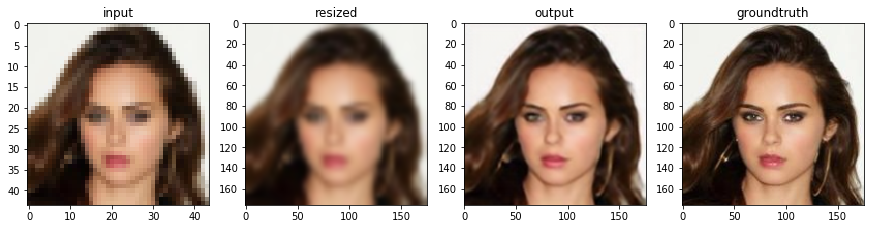

In [53]:
test_idx = 21

# 저해상도 이미지(input)
x1_test = np.load(x_test_list[test_idx])

# 저해상도 이미지 확대시킨 이미지
x1_test_resized = pyramid_expand(x1_test, 
                                 4,
                                 multichannel=True) # 색깔 채널 조건 추가.

# 정답 이미지
y1_test = np.load(y_test_list[test_idx])

# 모델이 예측한 이미지(output)
y_pred = model.predict(x1_test.reshape((1, 44, 44, 3)))

print(x1_test.shape, y1_test.shape)

x1_test = (x1_test * 255).astype(np.uint8)
x1_test_resized = (x1_test_resized * 255).astype(np.uint8)
y1_test = (y1_test * 255).astype(np.uint8)
y_pred = np.clip(y_pred.reshape((176, 176, 3)), 0, 1)

x1_test = cv2.cvtColor(x1_test, 
                       cv2.COLOR_BGR2RGB)

x1_test_resized = cv2.cvtColor(x1_test_resized, 
                               cv2.COLOR_BGR2RGB)

y1_test = cv2.cvtColor(y1_test, 
                       cv2.COLOR_BGR2RGB)

y_pred = cv2.cvtColor(y_pred, 
                      cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,4,figsize=(15, 10))
ax = ax.ravel()

ax[0].set_title('input')
ax[0].imshow(x1_test)

ax[1].set_title('resized')
ax[1].imshow(x1_test_resized)

ax[2].set_title('output')
ax[2].imshow(y_pred)

ax[3].set_title('groundtruth')
ax[3].imshow(y1_test)